# Install Spark and download data

In [ ]:
!apt-get update                                                                          # Update packages inside the VM
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # Install Java Development Kit (Required for installing Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz   # Install Spark 3.5.1
!tar xzvf spark-3.5.1-bin-hadoop3.tgz                                                    # Unzip Spark 3.5.1 file
!pip install -q findspark

In [1]:
# Set enviroment variable
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

!pip install pyspark==3.5.1

In [2]:
# Show the processor of Google Colab
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.204
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.40
clflush size	: 64
cache_alignment	: 64
ad

In [3]:
# create a session for using Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").appName("data_cleansing_App").getOrCreate()  #local[*] use all available processors



In [4]:
# check Python version
import sys
sys.version_info

sys.version_info(major=3, minor=10, micro=12, releaselevel='final', serial=0)

In [5]:
# check Spark version
spark.version

'3.5.1'

In [6]:
# load the data file
!wget https://file.designil.com/f/6BamyF+ -O w2_input.parquet

--2024-08-09 18:30:12--  https://file.designil.com/f/6BamyF+
Resolving file.designil.com (file.designil.com)... 172.67.130.97, 104.21.8.81, 2606:4700:3035::ac43:8261, ...
Connecting to file.designil.com (file.designil.com)|172.67.130.97|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-std.droplr.net/files/acc_513973/6BamyF [following]
--2024-08-09 18:30:12--  https://cdn-std.droplr.net/files/acc_513973/6BamyF
Resolving cdn-std.droplr.net (cdn-std.droplr.net)... 108.138.94.96, 108.138.94.56, 108.138.94.90, ...
Connecting to cdn-std.droplr.net (cdn-std.droplr.net)|108.138.94.96|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6040473 (5.8M) [application/octet-stream]
Saving to: ‘w2_input.parquet’

w2_input.parquet    100%[===================>]   5.76M  --.-KB/s    in 0.1s    

2024-08-09 18:30:12 (54.5 MB/s) - ‘w2_input.parquet’ saved [6040473/6040473]



In [7]:
dt_raw= spark.read.parquet('w2_input.parquet')
dt_raw

DataFrame[transaction_id: string, date: string, product_id: string, price: double, quantity: bigint, customer_id: double, product_name: string, customer_country: string, customer_name: string, total_amount: double, thb_amount: double]

In [8]:
dt = dt_raw.select("transaction_id", "date","product_id","price","quantity","customer_id","customer_country","total_amount")

# Data Profiling




In [9]:
dt.show(20, truncate = False)

+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|transaction_id|date      |product_id|price|quantity|customer_id|customer_country|total_amount      |
+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|581482        |2024-05-10|22485     |21.47|12      |17490.0    |United Kingdom  |257.64            |
|581475        |2024-05-10|22596     |10.65|36      |13069.0    |United Kingdom  |383.40000000000003|
|581475        |2024-05-10|23235     |11.53|12      |13069.0    |United Kingdom  |138.35999999999999|
|581475        |2024-05-10|23272     |10.65|12      |13069.0    |United Kingdom  |127.80000000000001|
|581475        |2024-05-10|23239     |11.94|6       |13069.0    |United Kingdom  |71.64             |
|581475        |2024-05-10|21705     |10.65|24      |13069.0    |United Kingdom  |255.60000000000002|
|581475        |2024-05-10|22118     |11.53|18      |13069.0    |United Kingdom  |

In [10]:
dt.dtypes

[('transaction_id', 'string'),
 ('date', 'string'),
 ('product_id', 'string'),
 ('price', 'double'),
 ('quantity', 'bigint'),
 ('customer_id', 'double'),
 ('customer_country', 'string'),
 ('total_amount', 'double')]

In [11]:
dt.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- customer_country: string (nullable = true)
 |-- total_amount: double (nullable = true)



In [12]:
print((dt.count(), len(dt.columns)))

(536350, 8)


In [13]:
dt.select("date","product_id","price","quantity","customer_id","total_amount").describe().show()

+-------+----------+------------------+------------------+------------------+------------------+------------------+
|summary|      date|        product_id|             price|          quantity|       customer_id|      total_amount|
+-------+----------+------------------+------------------+------------------+------------------+------------------+
|  count|    536350|            536350|            536350|            536350|            536295|            536350|
|   mean|      NULL|27501.334602703962|12.662182287696377| 9.919347441036637|15227.893178194838|112.38934326462667|
| stddev|      NULL|16621.547250098723| 8.490450200816936|216.66229978946325|1716.5829320559255|2277.3839092737658|
|    min|2023-05-03|             10002|              5.13|            -80995|           12004.0|         -840113.8|
|    max|2024-05-10|            90214Z|            660.62|             80995|           18287.0|1002718.1000000001|
+-------+----------+------------------+------------------+--------------

In [14]:
dt.select("date","product_id","price","quantity","customer_id","total_amount").summary().show()

+-------+----------+------------------+------------------+------------------+------------------+------------------+
|summary|      date|        product_id|             price|          quantity|       customer_id|      total_amount|
+-------+----------+------------------+------------------+------------------+------------------+------------------+
|  count|    536350|            536350|            536350|            536350|            536295|            536350|
|   mean|      NULL|27501.334602703962|12.662182287696377| 9.919347441036637|15227.893178194838|112.38934326462667|
| stddev|      NULL|16621.547250098723| 8.490450200816936|216.66229978946325|1716.5829320559255|2277.3839092737658|
|    min|2023-05-03|             10002|              5.13|            -80995|           12004.0|         -840113.8|
|    25%|      NULL|           21929.0|             10.99|                 1|           13808.0|             16.18|
|    50%|      NULL|           22568.0|             11.94|              

In [15]:
dt.select("price").describe().show()


+-------+------------------+
|summary|             price|
+-------+------------------+
|  count|            536350|
|   mean|12.662182287696377|
| stddev| 8.490450200816936|
|    min|              5.13|
|    max|            660.62|
+-------+------------------+



In [16]:
# Find missing values
dt.summary("count").show()


+-------+--------------+------+----------+------+--------+-----------+----------------+------------+
|summary|transaction_id|  date|product_id| price|quantity|customer_id|customer_country|total_amount|
+-------+--------------+------+----------+------+--------+-----------+----------------+------------+
|  count|        536350|536350|    536350|536350|  536350|     536295|          536350|      536350|
+-------+--------------+------+----------+------+--------+-----------+----------------+------------+



In [17]:
# Display rows that have missing values
dt.where( dt.customer_id.isNull() ).show()

+--------------+----------+----------+-----+--------+-----------+----------------+-------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|customer_country|       total_amount|
+--------------+----------+----------+-----+--------+-----------+----------------+-------------------+
|       C581406|2024-05-09|    46000M| 6.19|    -240|       NULL|  United Kingdom|-1485.6000000000001|
|       C581406|2024-05-09|    46000S| 6.19|    -300|       NULL|  United Kingdom|-1857.0000000000002|
|       C575153|2024-04-09|     22947|44.25|      -1|       NULL|  United Kingdom|             -44.25|
|       C574288|2024-04-04|     22178|25.37|      -1|       NULL|  United Kingdom|             -25.37|
|       C573180|2024-03-29|     23048| 14.5|      -1|       NULL|  United Kingdom|              -14.5|
|       C569495|2024-03-05|     21843|21.47|      -1|       NULL|  United Kingdom|             -21.47|
|       C567518|2024-02-20|     22846|27.62|      -1|       NULL|  United

# EDA - Exploratory Data Analysis

In [18]:
dt.where(dt.price >= 600).show(5)

+--------------+----------+----------+------+--------+-----------+----------------+------------+
|transaction_id|      date|product_id| price|quantity|customer_id|customer_country|total_amount|
+--------------+----------+----------+------+--------+-----------+----------------+------------+
|        554836|2023-10-26|     22655|660.62|       1|    13015.0|  United Kingdom|      660.62|
|        551393|2023-09-28|     22656|660.62|       1|    14973.0|  United Kingdom|      660.62|
|        547814|2023-08-25|     22656|660.62|       1|    13452.0|  United Kingdom|      660.62|
|        546480|2023-08-14|     22656|660.62|       1|    13452.0|  United Kingdom|      660.62|
|        545759|2023-08-07|     22656|660.62|       2|    16316.0|  United Kingdom|     1321.24|
+--------------+----------+----------+------+--------+-----------+----------------+------------+
only showing top 5 rows



In [19]:
dt.where(dt.customer_country == 'Australia').show(5)

+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|customer_country|      total_amount|
+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|        578459|2024-04-25|     22338| 6.19|      96|    12388.0|       Australia|            594.24|
|        578459|2024-04-25|     22600| 6.19|      20|    12388.0|       Australia|123.80000000000001|
|        578459|2024-04-25|     22910| 6.19|      20|    12388.0|       Australia|123.80000000000001|
|        578459|2024-04-25|     22086| 6.19|      20|    12388.0|       Australia|123.80000000000001|
|        578459|2024-04-25|     22340| 6.19|      24|    12388.0|       Australia|            148.56|
+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
only showing top 5 rows



In [20]:
dt.where( dt.date.startswith("2024-05") ).count()

28771

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [22]:
# Convert Spark DataFrame to Pandas DataFrame
dt_pd = dt.toPandas()


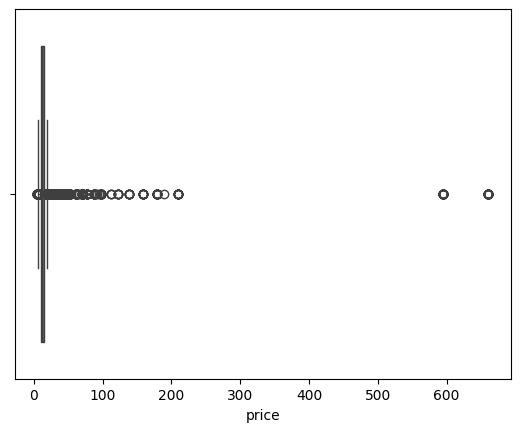

In [23]:
# Boxplot
sns.boxplot(x = dt_pd['price']) ;

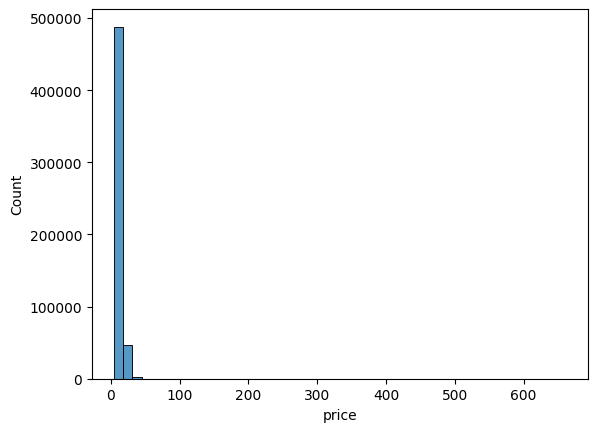

In [24]:
# Histogram
sns.histplot(dt_pd['price'], bins=50) ;

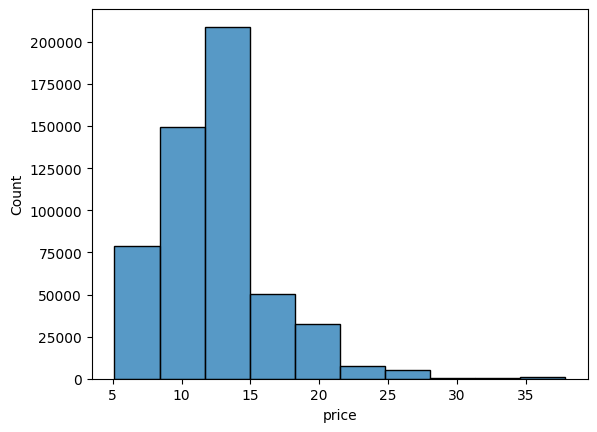

In [25]:
sns.histplot(dt_pd[dt_pd['price'] < 40]['price'], bins=10) ;

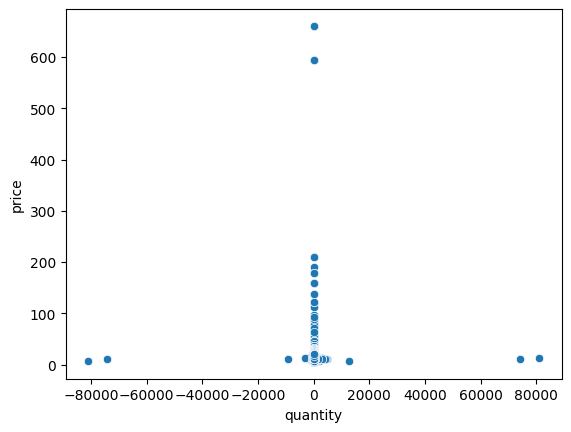

In [26]:
# Scatterplot - show relationship between two variables
sns.scatterplot(x=dt_pd.quantity, y=dt_pd.price) ;

# Data Cleansing with PySpark

In [27]:
dt.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- date: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- customer_country: string (nullable = true)
 |-- total_amount: double (nullable = true)



In [28]:
# Convert a string column to a datetime
from pyspark.sql import functions as f

dt_clean = dt.withColumn("date" , f.to_timestamp(dt.date, 'yyyy-MM-dd'))
dt_clean.show()

+--------------+-------------------+----------+-----+--------+-----------+----------------+------------------+
|transaction_id|               date|product_id|price|quantity|customer_id|customer_country|      total_amount|
+--------------+-------------------+----------+-----+--------+-----------+----------------+------------------+
|        581482|2024-05-10 00:00:00|     22485|21.47|      12|    17490.0|  United Kingdom|            257.64|
|        581475|2024-05-10 00:00:00|     22596|10.65|      36|    13069.0|  United Kingdom|383.40000000000003|
|        581475|2024-05-10 00:00:00|     23235|11.53|      12|    13069.0|  United Kingdom|138.35999999999999|
|        581475|2024-05-10 00:00:00|     23272|10.65|      12|    13069.0|  United Kingdom|127.80000000000001|
|        581475|2024-05-10 00:00:00|     23239|11.94|       6|    13069.0|  United Kingdom|             71.64|
|        581475|2024-05-10 00:00:00|     21705|10.65|      24|    13069.0|  United Kingdom|255.60000000000002|
|

In [29]:
dt_clean.select(f.min(dt_clean.date) , f.max(dt_clean.date)).show()

+-------------------+-------------------+
|          min(date)|          max(date)|
+-------------------+-------------------+
|2023-05-03 00:00:00|2024-05-10 00:00:00|
+-------------------+-------------------+



In [30]:
dt_clean.printSchema()

root
 |-- transaction_id: string (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- product_id: string (nullable = true)
 |-- price: double (nullable = true)
 |-- quantity: long (nullable = true)
 |-- customer_id: double (nullable = true)
 |-- customer_country: string (nullable = true)
 |-- total_amount: double (nullable = true)



In [31]:
# Count the total transactions for the first half of January 2024
dt_clean.where( (f.dayofmonth(dt_clean.date) <= 15) & ( f.month(dt_clean.date) == 1 ) & ( f.year(dt_clean.date) == 2024 ) ).count()

16398

In [32]:
# Anomalies Check

# Syntactical Anomalies -> Lexical errors

dt_clean.select("customer_country").distinct().count()

39

In [33]:
# Find the name of the country incorrect -> japan
dt_clean.select("customer_country").distinct().sort("customer_country").show( 40 )

+--------------------+
|    customer_country|
+--------------------+
|           Australia|
|             Austria|
|             Bahrain|
|             Belgium|
|              Brazil|
|              Canada|
|     Channel Islands|
|              Cyprus|
|      Czech Republic|
|             Denmark|
|                EIRE|
|  European Community|
|             Finland|
|              France|
|             Germany|
|              Greece|
|           Hong Kong|
|             Iceland|
|              Israel|
|               Italy|
|               Japan|
|              Japane|
|             Lebanon|
|           Lithuania|
|               Malta|
|         Netherlands|
|              Norway|
|              Poland|
|            Portugal|
|                 RSA|
|        Saudi Arabia|
|           Singapore|
|               Spain|
|              Sweden|
|         Switzerland|
|                 USA|
|United Arab Emirates|
|      United Kingdom|
|         Unspecified|
+--------------------+



In [34]:
dt_clean.where(dt_clean['customer_country'] == 'Japane').show()

+--------------+-------------------+----------+-----+--------+-----------+----------------+------------+
|transaction_id|               date|product_id|price|quantity|customer_id|customer_country|total_amount|
+--------------+-------------------+----------+-----+--------+-----------+----------------+------------+
|        566623|2024-02-14 00:00:00|     21787|11.12|      72|    12756.0|          Japane|      800.64|
|        566623|2024-02-14 00:00:00|     21786|10.68|      24|    12756.0|          Japane|      256.32|
|        566623|2024-02-14 00:00:00|     21789|11.12|      24|    12756.0|          Japane|      266.88|
|        566623|2024-02-14 00:00:00|     21788|11.12|      24|    12756.0|          Japane|      266.88|
+--------------+-------------------+----------+-----+--------+-----------+----------------+------------+



In [35]:
# convert japane to japan
from pyspark.sql.functions import when

dt_clean_country = dt_clean.withColumn("customer_country_update", when(dt_clean['customer_country'] == 'Japane', 'Japan').otherwise(dt_clean['customer_country']))
dt_clean_country.select("customer_country_update").distinct().sort("customer_country_update").show(40)

+-----------------------+
|customer_country_update|
+-----------------------+
|              Australia|
|                Austria|
|                Bahrain|
|                Belgium|
|                 Brazil|
|                 Canada|
|        Channel Islands|
|                 Cyprus|
|         Czech Republic|
|                Denmark|
|                   EIRE|
|     European Community|
|                Finland|
|                 France|
|                Germany|
|                 Greece|
|              Hong Kong|
|                Iceland|
|                 Israel|
|                  Italy|
|                  Japan|
|                Lebanon|
|              Lithuania|
|                  Malta|
|            Netherlands|
|                 Norway|
|                 Poland|
|               Portugal|
|                    RSA|
|           Saudi Arabia|
|              Singapore|
|                  Spain|
|                 Sweden|
|            Switzerland|
|                    USA|
|   United A

In [36]:
dt_clean_v2 = dt_clean_country.drop("customer_country").withColumnRenamed('customer_country_update', 'customer_country')
dt_clean_v2.show()

+--------------+-------------------+----------+-----+--------+-----------+------------------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|      total_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+------------------+----------------+
|        581482|2024-05-10 00:00:00|     22485|21.47|      12|    17490.0|            257.64|  United Kingdom|
|        581475|2024-05-10 00:00:00|     22596|10.65|      36|    13069.0|383.40000000000003|  United Kingdom|
|        581475|2024-05-10 00:00:00|     23235|11.53|      12|    13069.0|138.35999999999999|  United Kingdom|
|        581475|2024-05-10 00:00:00|     23272|10.65|      12|    13069.0|127.80000000000001|  United Kingdom|
|        581475|2024-05-10 00:00:00|     23239|11.94|       6|    13069.0|             71.64|  United Kingdom|
|        581475|2024-05-10 00:00:00|     21705|10.65|      24|    13069.0|255.60000000000002|  United Kingdom|
|

In [37]:
# Semantic Anomalies -> Integrity constraints: Values are outside the acceptable range, such as a product_id being longer than it should be

dt_clean_v2.select("product_id").show(100)

+----------+
|product_id|
+----------+
|     22485|
|     22596|
|     23235|
|     23272|
|     23239|
|     21705|
|     22118|
|     22119|
|     22217|
|     22216|
|     22380|
|     22442|
|     22664|
|     22721|
|     22723|
|     22785|
|     22955|
|     23141|
|     22956|
|     22581|
|     23198|
|     23197|
|     23184|
|     23168|
|     23167|
|     23166|
|     23165|
|     23004|
|     23002|
|     23000|
|     22998|
|     22994|
|     22835|
|     22730|
|     22728|
|     22727|
|     22726|
|     22720|
|     22693|
|     22670|
|     22667|
|     22666|
|     22631|
|     22628|
|     22467|
|     22197|
|     22114|
|     22112|
|     21908|
|     21874|
|     21872|
|     21871|
|     21533|
|     21481|
|     21479|
|     21248|
|     21216|
|     21181|
|     21175|
|     21169|
|     21162|
|     21159|
|     21158|
|     21154|
|     16016|
|     16014|
|     16008|
|     85152|
|    84596F|
|    84596B|
|    84510A|
|     82600|
|     82581|
|     72232|

In [38]:
dt_clean_v2.select("product_id").count()

536350

In [39]:
# product_id equal to 5 characters

dt_clean_v2.where(dt_clean_v2["product_id"].rlike("^.{5}$")).count() / dt_clean_v2.count()

0.9050601286473385

In [40]:
dt_correct_product = dt_clean_v2.filter(dt_clean_v2["product_id"].rlike("^.{5}$"))
dt_incorrect_product = dt_clean_v2.subtract(dt_correct_product)

dt_incorrect_product.show(10)

+--------------+-------------------+----------+-----+--------+-----------+------------------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|      total_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+------------------+----------------+
|        581133|2024-05-08 00:00:00|    90030B| 6.04|       6|    14904.0|             36.24|  United Kingdom|
|        580727|2024-05-06 00:00:00|    82001S| 5.97|       3|    14096.0|             17.91|  United Kingdom|
|        580730|2024-05-06 00:00:00|    82001S| 6.19|       7|    15730.0|43.330000000000005|  United Kingdom|
|        580527|2024-05-05 00:00:00|    84997B| 7.24|       1|    13736.0|              7.24|  United Kingdom|
|        579777|2024-05-01 00:00:00|    72799E| 6.19|       2|    13777.0|             12.38|  United Kingdom|
|        579508|2024-04-30 00:00:00|    85014A| 6.13|       1|    12508.0|              6.13|  United Kingdom|
|

In [41]:
# Use .substring() function to get only the first 5 characters
dt_clean_v3 = dt_clean_v2.withColumn('product_id', f.substring('product_id', 1, 5))

In [42]:
# check
dt_correct_product = dt_clean_v3.filter(dt_clean_v3["product_id"].rlike("^.{5}$"))
dt_incorrect_product = dt_clean_v3.subtract(dt_correct_product)

dt_incorrect_product.show(10)

+--------------+----+----------+-----+--------+-----------+------------+----------------+
|transaction_id|date|product_id|price|quantity|customer_id|total_amount|customer_country|
+--------------+----+----------+-----+--------+-----------+------------+----------------+
+--------------+----+----------+-----+--------+-----------+------------+----------------+



In [43]:
# Missing values


# check missing values
# col -> Spark command to select a column         sum -> Spark command to calculate the sum
from pyspark.sql.functions import col, sum

dt_nulllist = dt_clean_v3.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in dt_clean_v3.columns ])
dt_nulllist.show()

+--------------+----+----------+-----+--------+-----------+------------+----------------+
|transaction_id|date|product_id|price|quantity|customer_id|total_amount|customer_country|
+--------------+----+----------+-----+--------+-----------+------------+----------------+
|             0|   0|         0|    0|       0|         55|           0|               0|
+--------------+----+----------+-----+--------+-----------+------------+----------------+



In [44]:
# check missing values
dt_clean_v3.summary("count").show()

+-------+--------------+----------+------+--------+-----------+------------+----------------+
|summary|transaction_id|product_id| price|quantity|customer_id|total_amount|customer_country|
+-------+--------------+----------+------+--------+-----------+------------+----------------+
|  count|        536350|    536350|536350|  536350|     536295|      536350|          536350|
+-------+--------------+----------+------+--------+-----------+------------+----------------+



In [45]:
dt_clean_v3.where( dt_clean_v3.customer_id.isNull() ).show()

+--------------+-------------------+----------+-----+--------+-----------+-------------------+----------------+
|transaction_id|               date|product_id|price|quantity|customer_id|       total_amount|customer_country|
+--------------+-------------------+----------+-----+--------+-----------+-------------------+----------------+
|       C581406|2024-05-09 00:00:00|     46000| 6.19|    -240|       NULL|-1485.6000000000001|  United Kingdom|
|       C581406|2024-05-09 00:00:00|     46000| 6.19|    -300|       NULL|-1857.0000000000002|  United Kingdom|
|       C575153|2024-04-09 00:00:00|     22947|44.25|      -1|       NULL|             -44.25|  United Kingdom|
|       C574288|2024-04-04 00:00:00|     22178|25.37|      -1|       NULL|             -25.37|  United Kingdom|
|       C573180|2024-03-29 00:00:00|     23048| 14.5|      -1|       NULL|              -14.5|  United Kingdom|
|       C569495|2024-03-05 00:00:00|     21843|21.47|      -1|       NULL|             -21.47|  United K

In [46]:
dt_clean_v3.select('customer_id').distinct().show()

+-----------+
|customer_id|
+-----------+
|    17884.0|
|    16561.0|
|    13956.0|
|    14452.0|
|    16596.0|
|    14768.0|
|    13094.0|
|    14285.0|
|    16916.0|
|    17633.0|
|    13607.0|
|    13918.0|
|    14473.0|
|    16629.0|
|    12671.0|
|    14024.0|
|    17267.0|
|    15776.0|
|    12493.0|
|    13533.0|
+-----------+
only showing top 20 rows



In [47]:
# Replace NULL customer_id values with 00000
dt_clean_v4 = dt_clean_v3.withColumn("customer_id", when(dt_clean_v3['customer_id'].isNull(), '00000').otherwise(dt_clean_v3['customer_id']))

In [48]:
# check missing value
dt_clean_v4.where( dt_clean_v4.customer_id.isNull() ).show()

+--------------+----+----------+-----+--------+-----------+------------+----------------+
|transaction_id|date|product_id|price|quantity|customer_id|total_amount|customer_country|
+--------------+----+----------+-----+--------+-----------+------------+----------------+
+--------------+----+----------+-----+--------+-----------+------------+----------------+



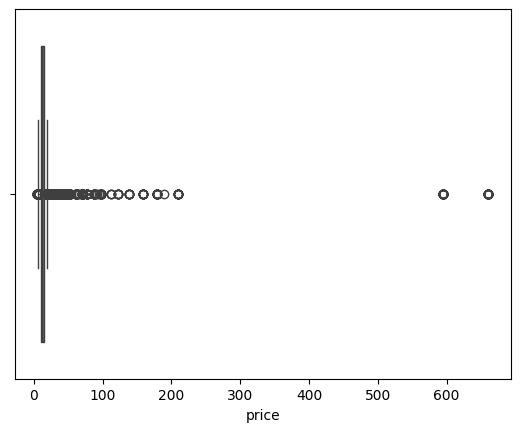

In [49]:
#  Outliers
sns.boxplot(x = dt_clean_v4.toPandas()['price']) ;

In [50]:
dt_clean_v4.where( dt_clean_v4.price > 600 ).select("product_id", "price").distinct().show(truncate = False)

+----------+------+
|product_id|price |
+----------+------+
|22656     |660.62|
|22655     |660.62|
+----------+------+



#  Data Cleansing with Spark SQL

In [51]:
# Convert the data from Spark DataFrame to a TempView
dt.createOrReplaceTempView("data")
dt_sql = spark.sql("SELECT * FROM data")
dt_sql.show()

+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|customer_country|      total_amount|
+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|  United Kingdom|            257.64|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|  United Kingdom|383.40000000000003|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|  United Kingdom|138.35999999999999|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0|  United Kingdom|127.80000000000001|
|        581475|2024-05-10|     23239|11.94|       6|    13069.0|  United Kingdom|             71.64|
|        581475|2024-05-10|     21705|10.65|      24|    13069.0|  United Kingdom|255.60000000000002|
|        581475|2024-05-10|     22118|11.53|      18|    13069.0|  United Kingdom|

In [52]:
dt_sql_country = spark.sql("""
SELECT distinct customer_country
FROM data
ORDER BY customer_country
""")
dt_sql_country.show(100)

+--------------------+
|    customer_country|
+--------------------+
|           Australia|
|             Austria|
|             Bahrain|
|             Belgium|
|              Brazil|
|              Canada|
|     Channel Islands|
|              Cyprus|
|      Czech Republic|
|             Denmark|
|                EIRE|
|  European Community|
|             Finland|
|              France|
|             Germany|
|              Greece|
|           Hong Kong|
|             Iceland|
|              Israel|
|               Italy|
|               Japan|
|              Japane|
|             Lebanon|
|           Lithuania|
|               Malta|
|         Netherlands|
|              Norway|
|              Poland|
|            Portugal|
|                 RSA|
|        Saudi Arabia|
|           Singapore|
|               Spain|
|              Sweden|
|         Switzerland|
|                 USA|
|United Arab Emirates|
|      United Kingdom|
|         Unspecified|
+--------------------+



In [53]:
# convert Japane to Japan
dt_sql_transform = spark.sql("""
SELECT
    transaction_id,
    date,
    product_id,
    price,
    quantity,
    customer_id,
    CASE WHEN customer_country = 'Japane' THEN 'Japan' ELSE customer_country END AS customer_country,
    total_amount
FROM
    data
""")
dt_sql_transform.show()

+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|customer_country|      total_amount|
+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|        581482|2024-05-10|     22485|21.47|      12|    17490.0|  United Kingdom|            257.64|
|        581475|2024-05-10|     22596|10.65|      36|    13069.0|  United Kingdom|383.40000000000003|
|        581475|2024-05-10|     23235|11.53|      12|    13069.0|  United Kingdom|138.35999999999999|
|        581475|2024-05-10|     23272|10.65|      12|    13069.0|  United Kingdom|127.80000000000001|
|        581475|2024-05-10|     23239|11.94|       6|    13069.0|  United Kingdom|             71.64|
|        581475|2024-05-10|     21705|10.65|      24|    13069.0|  United Kingdom|255.60000000000002|
|        581475|2024-05-10|     22118|11.53|      18|    13069.0|  United Kingdom|

In [54]:
# check result after cleansing
dt_sql_transform.select("customer_country").distinct().sort("customer_country").show(50)

+--------------------+
|    customer_country|
+--------------------+
|           Australia|
|             Austria|
|             Bahrain|
|             Belgium|
|              Brazil|
|              Canada|
|     Channel Islands|
|              Cyprus|
|      Czech Republic|
|             Denmark|
|                EIRE|
|  European Community|
|             Finland|
|              France|
|             Germany|
|              Greece|
|           Hong Kong|
|             Iceland|
|              Israel|
|               Italy|
|               Japan|
|             Lebanon|
|           Lithuania|
|               Malta|
|         Netherlands|
|              Norway|
|              Poland|
|            Portugal|
|                 RSA|
|        Saudi Arabia|
|           Singapore|
|               Spain|
|              Sweden|
|         Switzerland|
|                 USA|
|United Arab Emirates|
|      United Kingdom|
|         Unspecified|
+--------------------+



In [55]:
# Check incorrect product_id (character>5)

dt_sql_check_productid = spark.sql("""
SELECT *
FROM data
WHERE product_id NOT RLIKE '^.{5}$'
""").show()

+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|transaction_id|      date|product_id|price|quantity|customer_id|customer_country|      total_amount|
+--------------+----------+----------+-----+--------+-----------+----------------+------------------+
|        581476|2024-05-10|    84596F|10.68|      32|    12433.0|          Norway|            341.76|
|        581476|2024-05-10|    84596B|10.68|      16|    12433.0|          Norway|            170.88|
|        581476|2024-05-10|    84510A|11.53|      20|    12433.0|          Norway|             230.6|
|        581476|2024-05-10|    47559B|11.53|      10|    12433.0|          Norway|             115.3|
|        581476|2024-05-10|    47504H|11.06|      36|    12433.0|          Norway|            398.16|
|        581477|2024-05-10|    84970L|11.53|      12|    13426.0|  United Kingdom|138.35999999999999|
|        581478|2024-05-10|    84997C| 14.5|       4|    17364.0|  United Kingdom|

In [56]:
# Use CASE WHEN to clean incorect product_id

dt_sql_productid_clean = spark.sql("""
SELECT
    transaction_id,
    CASE
      WHEN length(product_id) > 5
      THEN substr(product_id, 1, 5)
      ELSE product_id
    END AS product_id,
    price,
    quantity,
    customer_id,
    customer_country,
    total_amount

FROM
    data
""")
dt_sql_productid_clean.show()

+--------------+----------+-----+--------+-----------+----------------+------------------+
|transaction_id|product_id|price|quantity|customer_id|customer_country|      total_amount|
+--------------+----------+-----+--------+-----------+----------------+------------------+
|        581482|     22485|21.47|      12|    17490.0|  United Kingdom|            257.64|
|        581475|     22596|10.65|      36|    13069.0|  United Kingdom|383.40000000000003|
|        581475|     23235|11.53|      12|    13069.0|  United Kingdom|138.35999999999999|
|        581475|     23272|10.65|      12|    13069.0|  United Kingdom|127.80000000000001|
|        581475|     23239|11.94|       6|    13069.0|  United Kingdom|             71.64|
|        581475|     21705|10.65|      24|    13069.0|  United Kingdom|255.60000000000002|
|        581475|     22118|11.53|      18|    13069.0|  United Kingdom|            207.54|
|        581475|     22119|12.25|      12|    13069.0|  United Kingdom|             147.0|

In [57]:
# Check the result after cleansing
dt_sql_productid_clean.filter(~dt_sql_productid_clean["product_id"].rlike("^.{5}$")).show()

+--------------+----------+-----+--------+-----------+----------------+------------+
|transaction_id|product_id|price|quantity|customer_id|customer_country|total_amount|
+--------------+----------+-----+--------+-----------+----------------+------------+
+--------------+----------+-----+--------+-----------+----------------+------------+



# Data Export in PySpark

In [ ]:
# Save to a Parquet file
dt_clean.write.parquet("cleaned_data_output.parquet")

In [ ]:
dt2 = spark.read.parquet("cleaned_data_output.parquet")

dt2.show(10)

In [ ]:
dt_clean.write.mode("overwrite").parquet("cleaned_data_output.parquet")

In [ ]:
# Save to a CSV file
dt_clean.write.csv('cleaned_data.csv', header = True)

In [ ]:
# Excel
dt_clean.toPandas().to_excel("output.xlsx")